In [1]:
import sys
sys.path.insert(0, '../..')

In [2]:
%matplotlib inline
import numpy as np
import torch
import matplotlib.pyplot as plt

from causal_meta.utils.data_utils import RandomSplineSCM

In [3]:
scm = RandomSplineSCM(input_noise=False, output_noise=True,
    span=8., num_anchors=8, order=2, range_scale=1.)
num_points = 1000

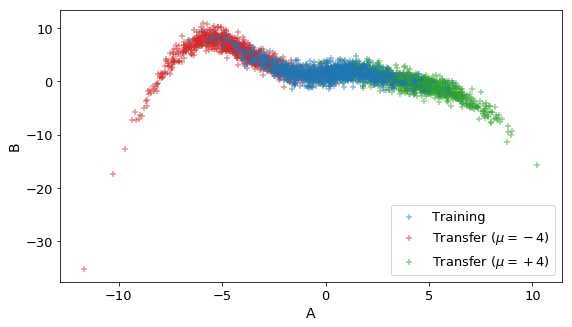

In [4]:
plt.figure(figsize=(9, 5))
ax = plt.subplot(1, 1, 1)
mus = [0, -4., 4.]
colors = ['C0', 'C3', 'C2']
labels = ['Training', r'Transfer ($\mu = -4$)', r'Transfer ($\mu = +4$)']

for i, (mu, color, label) in enumerate(zip(mus, colors, labels)):
    X = mu + 2 * torch.randn((1000, 1))
    ax.scatter(X.squeeze(1).numpy(), scm(X).squeeze(1).numpy(), color=color, marker='+', alpha=0.5, label=label, zorder=2 - i)

ax.tick_params(axis='both', which='major', labelsize=13)
ax.legend(loc=4, prop={'size': 13})
ax.set_xlabel('A', fontsize=14)
ax.set_ylabel('B', fontsize=14)

plt.show()